- **Nama:** Difa Fisabilillah
- **Email:** difafisabilillah91@gmail.com
- **ID Dicoding:** MC401D5X0255

# **1. Perkenalan Dataset**


**Sumber Dataset**:  
  [Kaggle H&M Personalized Fashion Recommendations](https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations)
   
**Deskripsi Dataset** :
 * **articles.csv** - data terperinci untuk setiap produk yang tersedia untuk dibeli.
 * **customers.csv** - data untuk setiap customer.
 * **transactions_train.csv** - data terdiri dari pembelian yang dilakukan setiap pelanggan pada setiap tanggal, serta informasi tambahan. Baris duplikat menunjukkan pembelian beberapa kali untuk item yang sama.

**Deskripsi Feature**:
* **articles.csv**
  * **article_id** : ID unik untuk setiap Produk.
  * **product_code** : Kode produk yang lebih umum.
  * **prod_name** : Nama produk.
  * **product_type_no & product_type_name** : Jenis produk
  * **product_group_name** : Kelompok produk
  * **graphical_appearance_no & graphical_appearance_name** : Tampilan grafis produk.
  * **colour_group_code & colour_group_name** : Warna produk.
  * **perceived_colour_value_name & perceived_colour_master_name** : Warna yang dirasakan pelanggan.
  * **department_no & department_name** : Departemen tempat produk dijual.
  * **index_code & index_name** : Kategori indeks produk.
  * **garment_group_no & garment_group_name** → Kelompok pakaian (misalnya: atasan, bawahan).
  * **detail_desc** → Deskripsi lengkap produk.
* **customers.csv**
 * **customer_id** : ID unik pelanggan.
 * **FN** : customer yang menerima Fasion News (tidak menerima → Nan, menerima → 1)
 * **Active** : Informasi aktif pelanggan (aktif → 1, non-aktif: Nan).
 * **club_member_status** : Status keanggotaan pelanggan
 * fashion_news_frequency : Seberapa sering pelanggan menerima berita fashion dari H&M.
 * age : Usia pelanggan.
 * postal_code : Kode pos tempat tinggal pelanggan.
* **transactions_train.csv**
 * **t_dat** : Tanggal transaksi.
 * **customer_id** : ID pelanggan.
 * **article_id** : ID produk yang dibeli.
 * **price** : Harga produk yang dibeli (data ini sudah dinormalisasi oleh pihak publisher H&M).
 * **sales_channel_id** : Channel penjualan (on-store -> 1 , online → 2).



# **2. Import Library**

In [1]:
!pip install category_encoders
!pip install scikit-optimize


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import gdown
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from sklearn.preprocessing import StandardScaler
from category_encoders import OrdinalEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN
from skopt import gp_minimize
from skopt.space import Integer, Categorical, Real
from sklearn.metrics import silhouette_score
from functools import partial
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture



In [3]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="skopt")

# **3. Memuat Dataset**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd './drive/MyDrive/Dicoding/Project 2/'

/content/drive/MyDrive/Dicoding/Project 2


In [6]:
# gdown.download("https://drive.google.com/uc?id=1z1Gqaf01HvkcdfOMAqCDj2u8cCNEpiIZ", "data.zip", quiet=False)

# # Ekstrak file ZIP
# with zipfile.ZipFile("data.zip", "r") as zip_ref:
#     zip_ref.extractall("data_folder")

# print("File berhasil diekstrak!")


In [8]:
articles = pd.read_csv('./data_folder/articles.csv')
customers = pd.read_csv('./data_folder/customers.csv')
transactions_train = pd.read_csv('./data_folder/transactions_train.csv')

# **4. Exploratory Data Analysis (EDA)**



### **Struktur Data**

In [9]:
print(f'jumlah baris data articles : {articles.shape}')
print(f'jumlah baris data customers : {customers.shape}')
print(f'jumlah baris data transactions_train : {transactions_train.shape}')

jumlah baris data articles : (105542, 25)
jumlah baris data customers : (1371980, 7)
jumlah baris data transactions_train : (31788324, 5)


**Insight** : <br>
Pada ketika data ini memiliki jumlah baris yang berbeda beda.
1. **articles** berisi 105.542 baris data dengan 25 kolom
2. **customers** berisi 1.371.980 baris data dan 7 kolom
3. **transactions_train** berisi 31.788.324 baris data dan 5 kolom

In [10]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [11]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355969 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [12]:
transactions_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


**Insight :**
1. pada **articles** memiliki **11 kolom numerik** dan **14 kolom kategori**
2. pada **customers** memiliki **3 kolom numerik** dan **4 kolom kategori**
3. pada **transactions_train** memiliki **3 kolom numerik** dan **2 kolom kategori**

### **Data yang Hilang dan Duplikat**

In [13]:
missing_articles = (articles.isnull().sum()/len(articles)).apply(lambda x: f'{x:.2%}')
print(missing_articles[articles.isnull().sum() > 0])

detail_desc    0.39%
dtype: object


In [14]:
missing_customers = (customers.isnull().sum() / len(customers)).apply(lambda x: f'{x:.2%}')
print(missing_customers[customers.isnull().sum() > 0])

FN                        65.24%
Active                    66.15%
club_member_status         0.44%
fashion_news_frequency     1.17%
age                        1.16%
dtype: object


In [15]:
missing_transactions_train = (transactions_train.isnull().sum() / len(transactions_train)).apply(lambda x: f'{x:.2%}')
missing_transactions_train[transactions_train.isnull().sum() > 0]

Series([], dtype: object)

In [16]:
print(f'duplikat di articles : {articles.duplicated().sum()}')
print(f'duplikat di customers : {customers.duplicated().sum()}')
print(f'duplikat di transactions_train : {transactions_train.duplicated().sum()}')

duplikat di articles : 0
duplikat di customers : 0
duplikat di transactions_train : 2974905


**Insight :** <br>
1. Pada data articles, missing value hanya terdapat pada kolom detail_desc sebesar 0,39% dari keseluruhan data. Jumlah missing data ini sangat sedikit.
2. Pada data customers, terdapat 5 kolom yang memiliki missing data, di mana kolom FN dan Active hampir seluruhnya berisi NaN value. Ini berarti lebih dari separuh pelanggan tidak aktif dan tidak menerima fashion news.
3. Pada data transactions_train, tidak terdapat missing value sama sekali, sehingga data ini lengkap dalam mencatat transaksi setiap waktunya.
4. Data duplikat banyak ditemukan pada transactions_train. Namun, duplikasi ini masih wajar karena menunjukkan pembelian yang dilakukan beberapa kali untuk item yang sama.

### **Analisis Distribusi**

Agar data lebih mudah untuk dianalisis, ketiga dataset digabungkan menjadi satu. Pada proses ini, dilakukan merge antara data customers dan transactions_train terlebih dahulu.

In [17]:
customers_transactions_train = transactions_train.merge(customers, on='customer_id', how='left')

In [18]:
customers_transactions_train['t_dat'] = pd.to_datetime(customers_transactions_train['t_dat'])

In [19]:
customers_transactions_train['year'] = customers_transactions_train['t_dat'].dt.year

In [20]:
customers_transactions_train['year'].unique()

array([2018, 2019, 2020], dtype=int32)

In [21]:
customers_transactions_train.shape

(31788324, 12)

In [22]:
customers_transactions_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 12 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   t_dat                   datetime64[ns]
 1   customer_id             object        
 2   article_id              int64         
 3   price                   float64       
 4   sales_channel_id        int64         
 5   FN                      float64       
 6   Active                  float64       
 7   club_member_status      object        
 8   fashion_news_frequency  object        
 9   age                     float64       
 10  postal_code             object        
 11  year                    int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(2), object(4)
memory usage: 2.7+ GB


Sebelum melakukan analisis distribusi data, pada analisis sebelumnya diketahui bahwa jumlah baris data transaksi terdiri dari tahun 2018–2020 dengan jumlah 31.788.324 baris data. Jumlah ini sangat besar, sehingga menyebabkan proses runtime menjadi berat dan lama. Oleh karena itu, diputuskan untuk mengambil sampel data tetapi tetap dapat mewakili keseluruhan populasi secara adil untuk semua tahun.

In [23]:
plt.style.use('fivethirtyeight')

### **Sampling Data**

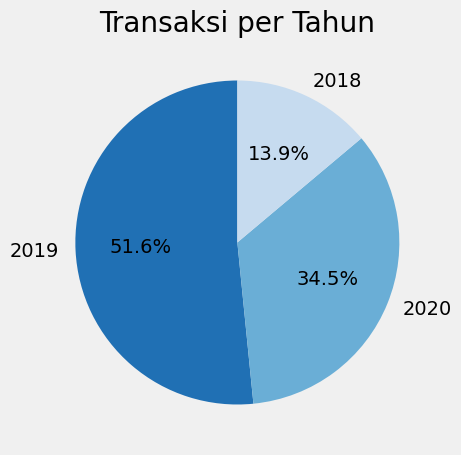

In [24]:
year_count = customers_transactions_train['year'].value_counts().sort_values(ascending=False)
colors = sns.color_palette("Blues", len(year_count))[::-1]
plt.figure(figsize=(6, 5))
plt.pie(year_count, labels=year_count.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Transaksi per Tahun')
plt.show()

Chart di atas menunjukkan proporsi data transaksi tiap tahunnya sebelum dilakukan pengambilan sampel. Agar ukuran sampel tetap mewakili data sebenarnya, digunakan sample size calculator dengan mempertimbangkan jumlah populasi (31.788.324 baris data), confidence level (tingkat kepercayaan), dan margin of error (batas kesalahan yang ditoleransi).

In [25]:
def sample_size_calculator(population_size, confidence_level, margin_of_error, p=0.5):
    alpha = 1 - (confidence_level / 100)
    z_score = abs(stats.norm.ppf(alpha / 2))
    E = margin_of_error / 100
    n0 = (z_score**2 * p * (1 - p)) / (E**2)
    n = n0 / (1 + ((n0 - 1) / population_size))
    return int(round(n))
total_population = len(customers_transactions_train)
total_sample_size = sample_size_calculator(total_population, confidence_level=95, margin_of_error=1)
print(f"Total sampel yang diambil: {total_sample_size}")

Total sampel yang diambil: 9601


In [26]:
split = StratifiedShuffleSplit(n_splits=1, test_size=9601/len(customers_transactions_train), random_state=42)

for train_index, sample_index in split.split(customers_transactions_train, customers_transactions_train['year']):
    sample_data_1 = customers_transactions_train.loc[sample_index]


In [27]:
split = StratifiedShuffleSplit(n_splits=1, test_size=9601/len(customers_transactions_train), random_state=1)

for train_index, sample_index in split.split(customers_transactions_train, customers_transactions_train['year']):
    sample_data_2 = customers_transactions_train.loc[sample_index]


In [28]:
sampel = pd.concat([sample_data_1, sample_data_2])


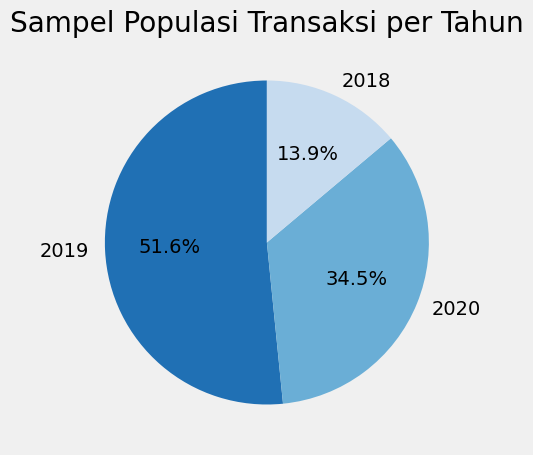

In [29]:
year_count = sampel['year'].value_counts().sort_values(ascending=False)
colors = sns.color_palette("Blues", len(year_count))[::-1]
plt.figure(figsize=(6, 5))
plt.pie(year_count, labels=year_count.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Sampel Populasi Transaksi per Tahun')
plt.show()

Pada chart pie di atas, dapat dilihat bahwa proporsi data sampel tiap tahunnya tetap sama dengan proporsi data asli sebelum dilakukan sampling. Hal ini menunjukkan bahwa proses sampling yang dilakukan sudah mempertahankan proporsi data asli.

Kemudian dilakukan merge atau penggabungan data sampel dengan data articles, sehingga diperoleh jumlah data sampel sebanyak 19.202 dari total 31.788.324 baris data.

In [30]:
fasion_data_hnm = sampel.merge(articles, on='article_id', how='left')
fasion_data_hnm.shape

(19202, 36)

In [31]:
fasion_data_hnm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19202 entries, 0 to 19201
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   t_dat                         19202 non-null  datetime64[ns]
 1   customer_id                   19202 non-null  object        
 2   article_id                    19202 non-null  int64         
 3   price                         19202 non-null  float64       
 4   sales_channel_id              19202 non-null  int64         
 5   FN                            8268 non-null   float64       
 6   Active                        8160 non-null   float64       
 7   club_member_status            19162 non-null  object        
 8   fashion_news_frequency        19116 non-null  object        
 9   age                           19116 non-null  float64       
 10  postal_code                   19202 non-null  object        
 11  year                        

In [32]:
fasion_data_hnm.to_csv('Dataset_clustering.csv', index=False)

# **5. Data Preprocessing**

### Penanganan Missing Value

In [33]:
missing_fasion = (fasion_data_hnm.isnull().sum()/len(fasion_data_hnm)).apply(lambda x : f'{x:.2%}')
missing_fasion[fasion_data_hnm.isnull().sum() > 0]

FN                        56.94%
Active                    57.50%
club_member_status         0.21%
fashion_news_frequency     0.45%
age                        0.45%
detail_desc                0.42%
dtype: object

In [34]:
fasion_data_hnm['FN'].unique()

array([nan,  1.])

In [35]:
fasion_data_hnm['Active'].unique()

array([nan,  1.])

FN (Fashion News Newsletter) menunjukkan keinginan pengguna untuk menerima berita mode. Nilai 1 berarti pengguna ingin menerima berita, sedangkan NaN atau 0 berarti sebaliknya.

Sebanyak 57% pelanggan memiliki nilai kosong (NaN) pada kolom Fashion News Newsletter, yang menunjukkan bahwa mereka bukan pelanggan yang terdaftar secara online (kolom Active), tetapi sudah terbiasa berbelanja langsung di toko fisik.

In [36]:
fasion_data_hnm['club_member_status'].unique()

array(['ACTIVE', 'LEFT CLUB', 'PRE-CREATE', nan], dtype=object)

Nilai NaN pada kolom club_member_status dapat diartikan sebagai pelanggan yang tidak tergabung dalam klub mana pun. Oleh karena itu, nilai NaN bisa diganti dengan "NO MEMBERSHIP" agar lebih jelas dan mempermudah analisis data.

In [37]:
fasion_data_hnm['FN']= fasion_data_hnm['FN'].fillna(0)
fasion_data_hnm['Active'] = fasion_data_hnm['Active'].fillna(0)
fasion_data_hnm['club_member_status'] = fasion_data_hnm['club_member_status'].fillna('NO MEMBERSHIP')

Untuk Kolom Age nilai null diisi dengan median

In [38]:
fasion_data_hnm['age'] = fasion_data_hnm['age'].fillna(fasion_data_hnm['age'].median())

FN dan fashion_news_frequency berkaitan, karena fashion_news_frequency menunjukkan seberapa sering pelanggan menerima berita

In [39]:
fasion_data_hnm['fashion_news_frequency'].unique()

array(['NONE', 'Regularly', nan, 'Monthly'], dtype=object)

In [40]:
fasion_data_hnm['fashion_news_frequency'] = fasion_data_hnm['fashion_news_frequency'].fillna('NONE')


Karena kolom detail_desc tidak diperlukan untuk saat ini, maka kolom tersebut dihapus

In [41]:
fasion_data_hnm.drop(columns=['detail_desc'], inplace=True)

In [42]:
missing_fasion = (fasion_data_hnm.isnull().sum()/len(fasion_data_hnm)).apply(lambda x : f'{x:.2%}')
missing_fasion[fasion_data_hnm.isnull().sum() > 0]

Series([], dtype: object)

### Penangganan Duplikat

In [43]:
print(f'Data Duplikat : {fasion_data_hnm.duplicated().sum()}')

Data Duplikat : 3


In [44]:
fasion_data_hnm.drop_duplicates(inplace=True)

### Penanganan Outliers

In [45]:
q1, q3 = fasion_data_hnm['age'].quantile([0.25, 0.75])
IQR = q3 - q1
upper = q3 + 1.5 * IQR
lower = q1 - 1.5 * IQR


In [46]:
min_non_outlier_age = fasion_data_hnm[fasion_data_hnm['age'] >= lower]['age'].min()
max_non_outlier_age = fasion_data_hnm[fasion_data_hnm['age'] <= upper]['age'].max()
print("Minimal age yang bukan outlier:", min_non_outlier_age)
print("Maksimal age yang bukan outlier:", max_non_outlier_age)
outlier_age = fasion_data_hnm[(fasion_data_hnm['age'] > upper) | (fasion_data_hnm['age'] < lower)]
outlier_age['age']


Minimal age yang bukan outlier: 16.0
Maksimal age yang bukan outlier: 82.0


12469    90.0
14231    83.0
16297    84.0
17540    91.0
Name: age, dtype: float64

Outliers pada umur hanya 4 yang yang melebihi range maximal. tapi hal ini masih wajar karena umur masih di 83 dan 91. sehingga tidak perlu di lakukan penghapusan

In [47]:
fasion_data_hnm['price'].describe()

count    19199.000000
mean         0.027878
std          0.019357
min          0.000797
25%          0.015525
50%          0.025407
75%          0.033881
max          0.422034
Name: price, dtype: float64

pada tabel di atas range price mulai dari 0.000797 - 0.337288. pada data price ini Harga sudah dinormalisasi sehingga bernilai antara 0 dan 1

In [49]:
q1_price, q3_price = fasion_data_hnm['price'].quantile(0.25), fasion_data_hnm['price'].quantile(0.75)
IQR = q3_price - q1_price
lower_price = q1_price - 1.5 * IQR
upper_price = q3_price + 1.5 * IQR
min_non_outlier_price = fasion_data_hnm[fasion_data_hnm['price'] >= lower_price]['price'].min()
max_non_outlier_price = fasion_data_hnm[fasion_data_hnm['price'] <= upper_price]['price'].max()
print(f'Minimal price  yang bukan outlier : {min_non_outlier_price}')
print(f'Maximal price  yang bukan outlier : {max_non_outlier_price}')
outlier_price = fasion_data_hnm[(fasion_data_hnm['price'] < lower_price) | (fasion_data_hnm['price'] > upper_price)]



Minimal price  yang bukan outlier : 0.0007966101694915
Maximal price  yang bukan outlier : 0.0610169491525423


<Axes: xlabel='price', ylabel='Count'>

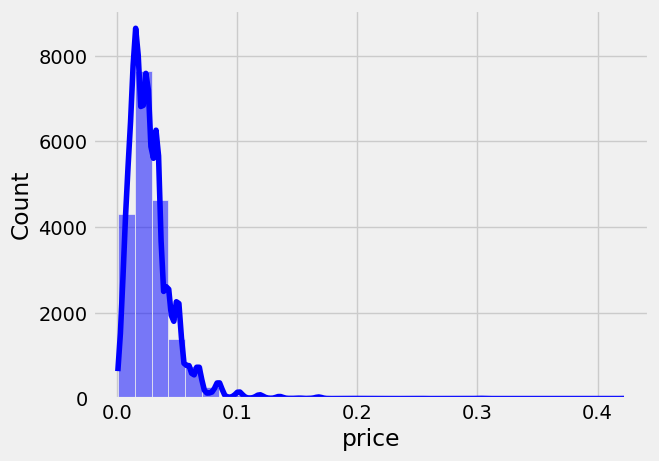

In [50]:
sns.histplot(fasion_data_hnm['price'], bins=30, kde=True, color='blue')

Pada histplot, dapat dilihat bahwa transaksi pembelian terbanyak berada pada rentang harga 0–0.1. Angka ini sangat kecil, yang mungkin disebabkan oleh beberapa faktor. Hal ini bisa dianggap wajar jika sebagian besar pelanggan lebih suka membeli produk dengan harga murah atau jika terdapat faktor eksternal seperti diskon, promosi, atau musim tertentu yang mempengaruhi harga produk sehingga menjadi lebih murah.

In [51]:
fasion_hnm = fasion_data_hnm[['t_dat', 'age', 'sales_channel_id', 'club_member_status', 'fashion_news_frequency', 'Active', 'product_group_name', 'garment_group_name', 'colour_group_name', 'index_group_name', 'graphical_appearance_name' , 'price', 'department_name' ]].copy()
fasion_hnm.head()

t_dat   age  sales_channel_id club_member_status  \
0 2019-07-14  31.0                 1             ACTIVE   
1 2020-05-24  31.0                 1             ACTIVE   
2 2019-06-08  32.0                 2             ACTIVE   
3 2020-01-15  35.0                 2             ACTIVE   
4 2019-07-16  24.0                 2          LEFT CLUB   

  fashion_news_frequency  Active  product_group_name garment_group_name  \
0                   NONE     0.0           Underwear  Under-, Nightwear   
1              Regularly     1.0         Accessories        Accessories   
2                   NONE     0.0               Shoes              Shoes   
3                   NONE     0.0  Garment Lower body       Jersey Basic   
4                   NONE     0.0  Garment Upper body       Jersey Fancy   

  colour_group_name index_group_name graphical_appearance_name     price  \
0             Black       Ladieswear                     Solid  0.025407   
1              Gold       Ladieswear                     Solid  0.011847   
2      Light Orange       Ladieswear                     Solid  0.033881   
3              Grey       Ladieswear                   Melange  0.016932   
4        Dark Green         Menswear                    Stripe  0.016932   

       department_name  
0  Expressive Lingerie  
1            Jewellery  
2                Heels  
3         Jersey Basic  
4         Jersey Fancy

Disini hanya dipilih fitur fitur yang berhubungan dnegan masalah bisnis saja sehingga disisni hanya dipilih 13 kolom saja.


### Binning (Pengelompokan Data)

Dilakukan pengkategorian terhadap rentang umur sehingga dapat dipisahkan ke dalam berbagai kategori usia, seperti anak-anak, remaja, dewasa, dan lansia. Kategorisasi ini bertujuan untuk mempermudah analisis berdasarkan kelompok usia pelanggan

In [52]:
def age_group(age):
    if age <= 12:
        return 'child'
    elif age <= 18:
        return 'Teenager'
    elif age <= 35:
        return 'Young Adult'
    elif age <= 55:
        return 'Adult'
    else:
        return 'Elderly'
fasion_hnm['age_group'] = fasion_hnm['age'].apply(age_group)

Untuk mengetahui apakah terdapat hubungan antara musim dan hari (seperti weekday dan weekend) yang mungkin memengaruhi minat belanja pelanggan, dilakukan penambahan fitur dari kolom t_dat. Hal ini bertujuan untuk menganalisis pola pembelian berdasarkan waktu.

In [53]:
fasion_hnm['day_of_weekend'] = fasion_hnm['t_dat'].dt.dayofweek
fasion_hnm['is_weekend'] = fasion_hnm['day_of_weekend'].apply(lambda x : 1 if x >= 5 else 0)

Untuk mengetahui apakah terdapat musim yang memengaruhi pola belanja pelanggan, dilakukan pengkategorian berdasarkan bulan ke dalam 4 musim, yaitu:
* Winter (Musim Dingin): Desember, Januari, Februari
* Spring (Musim Semi): Maret, April, Mei
* Summer (Musim Panas): Juni, Juli, Agustus
* Fall (Musim Gugur): September, Oktober, November <br>
Dengan pengelompokan ini, dapat dianalisis apakah ada pola tertentu dalam perilaku belanja pelanggan berdasarkan musim.

In [54]:
fasion_hnm['month'] = fasion_hnm['t_dat'].dt.month
def season(month):
  if month in [12,1,2]:
    return 'winter'
  elif month in [3,4,5]:
    return 'spring'
  elif month in [6,7,8]:
    return 'summer'
  else :
    return 'fall'

fasion_hnm['season'] = fasion_hnm['month'].apply(season)

In [55]:
fasion_hnm.drop(columns=['t_dat','month', 'day_of_weekend'], inplace=True)

In [56]:
fasion_hnm.head()

age  sales_channel_id club_member_status fashion_news_frequency  Active  \
0  31.0                 1             ACTIVE                   NONE     0.0   
1  31.0                 1             ACTIVE              Regularly     1.0   
2  32.0                 2             ACTIVE                   NONE     0.0   
3  35.0                 2             ACTIVE                   NONE     0.0   
4  24.0                 2          LEFT CLUB                   NONE     0.0   

   product_group_name garment_group_name colour_group_name index_group_name  \
0           Underwear  Under-, Nightwear             Black       Ladieswear   
1         Accessories        Accessories              Gold       Ladieswear   
2               Shoes              Shoes      Light Orange       Ladieswear   
3  Garment Lower body       Jersey Basic              Grey       Ladieswear   
4  Garment Upper body       Jersey Fancy        Dark Green         Menswear   

  graphical_appearance_name     price      department_name    age_group  \
0                     Solid  0.025407  Expressive Lingerie  Young Adult   
1                     Solid  0.011847            Jewellery  Young Adult   
2                     Solid  0.033881                Heels  Young Adult   
3                   Melange  0.016932         Jersey Basic  Young Adult   
4                    Stripe  0.016932         Jersey Fancy  Young Adult   

   is_weekend  season  
0           1  summer  
1           1  spring  
2           1  summer  
3           0  winter  
4           0  summer

### Encoding Fitur Kategori





Dilakukan encoding untuk mengubah data kategorikal menjadi numerik agar model lebih mudah dalam menangani dan memproses data. Teknik ini digunakan untuk memastikan bahwa data dalam format yang dapat dipahami oleh algoritma pembelajaran mesin.

In [57]:
le = OrdinalEncoder()
df_encode = le.fit_transform(fasion_hnm)
df_encode.head()

age  sales_channel_id  club_member_status  fashion_news_frequency  Active  \
0  31.0                 1                   1                       1     0.0   
1  31.0                 1                   1                       2     1.0   
2  32.0                 2                   1                       1     0.0   
3  35.0                 2                   1                       1     0.0   
4  24.0                 2                   2                       1     0.0   

   product_group_name  garment_group_name  colour_group_name  \
0                   1                   1                  1   
1                   2                   2                  2   
2                   3                   3                  3   
3                   4                   4                  4   
4                   5                   5                  5   

   index_group_name  graphical_appearance_name     price  department_name  \
0                 1                          1  0.025407                1   
1                 1                          1  0.011847                2   
2                 1                          1  0.033881                3   
3                 1                          2  0.016932                4   
4                 2                          3  0.016932                5   

   age_group  is_weekend  season  
0          1           1       1  
1          1           1       2  
2          1           1       1  
3          1           0       3  
4          1           0       1

### Scaling Fitur

In [58]:
kolom = df_encode.drop(columns=['price'])

In [59]:
scaler = StandardScaler()
df_scale = scaler.fit_transform(df_encode.drop(columns=['price']))
df_scale = pd.DataFrame(df_scale, columns=kolom.columns)
df_scale['price'] = df_encode['price']

In [70]:
df_scale.isnull().sum()

age                          0
sales_channel_id             0
club_member_status           0
fashion_news_frequency       0
Active                       0
product_group_name           0
garment_group_name           0
colour_group_name            0
index_group_name             0
graphical_appearance_name    0
department_name              0
age_group                    0
is_weekend                   0
season                       0
price                        3
dtype: int64

In [60]:
df_scale.head()

age  sales_channel_id  club_member_status  fashion_news_frequency  \
0 -0.399169         -1.551483           -0.147531               -0.871552   
1 -0.399169         -1.551483           -0.147531                1.144949   
2 -0.322431          0.644545           -0.147531               -0.871552   
3 -0.092218          0.644545           -0.147531               -0.871552   
4 -0.936334          0.644545            3.104412               -0.871552   

     Active  product_group_name  garment_group_name  colour_group_name  \
0 -0.859583           -2.166102           -1.471272          -1.009350   
1  1.163355           -1.580402           -1.236809          -0.907334   
2 -0.859583           -0.994703           -1.002346          -0.805319   
3 -0.859583           -0.409004           -0.767882          -0.703304   
4 -0.859583            0.176695           -0.533419          -0.601289   

   index_group_name  graphical_appearance_name  department_name  age_group  \
0         -0.691377                  -0.669735        -0.928285  -0.764597   
1         -0.691377                  -0.669735        -0.900255  -0.764597   
2         -0.691377                  -0.669735        -0.872225  -0.764597   
3         -0.691377                  -0.473438        -0.844195  -0.764597   
4          0.027678                  -0.277141        -0.816165  -0.764597   

   is_weekend    season     price  
0    1.566422 -1.228776  0.025407  
1    1.566422 -0.354701  0.011847  
2    1.566422 -1.228776  0.033881  
3   -0.638397  0.519373  0.016932  
4   -0.638397 -1.228776  0.016932

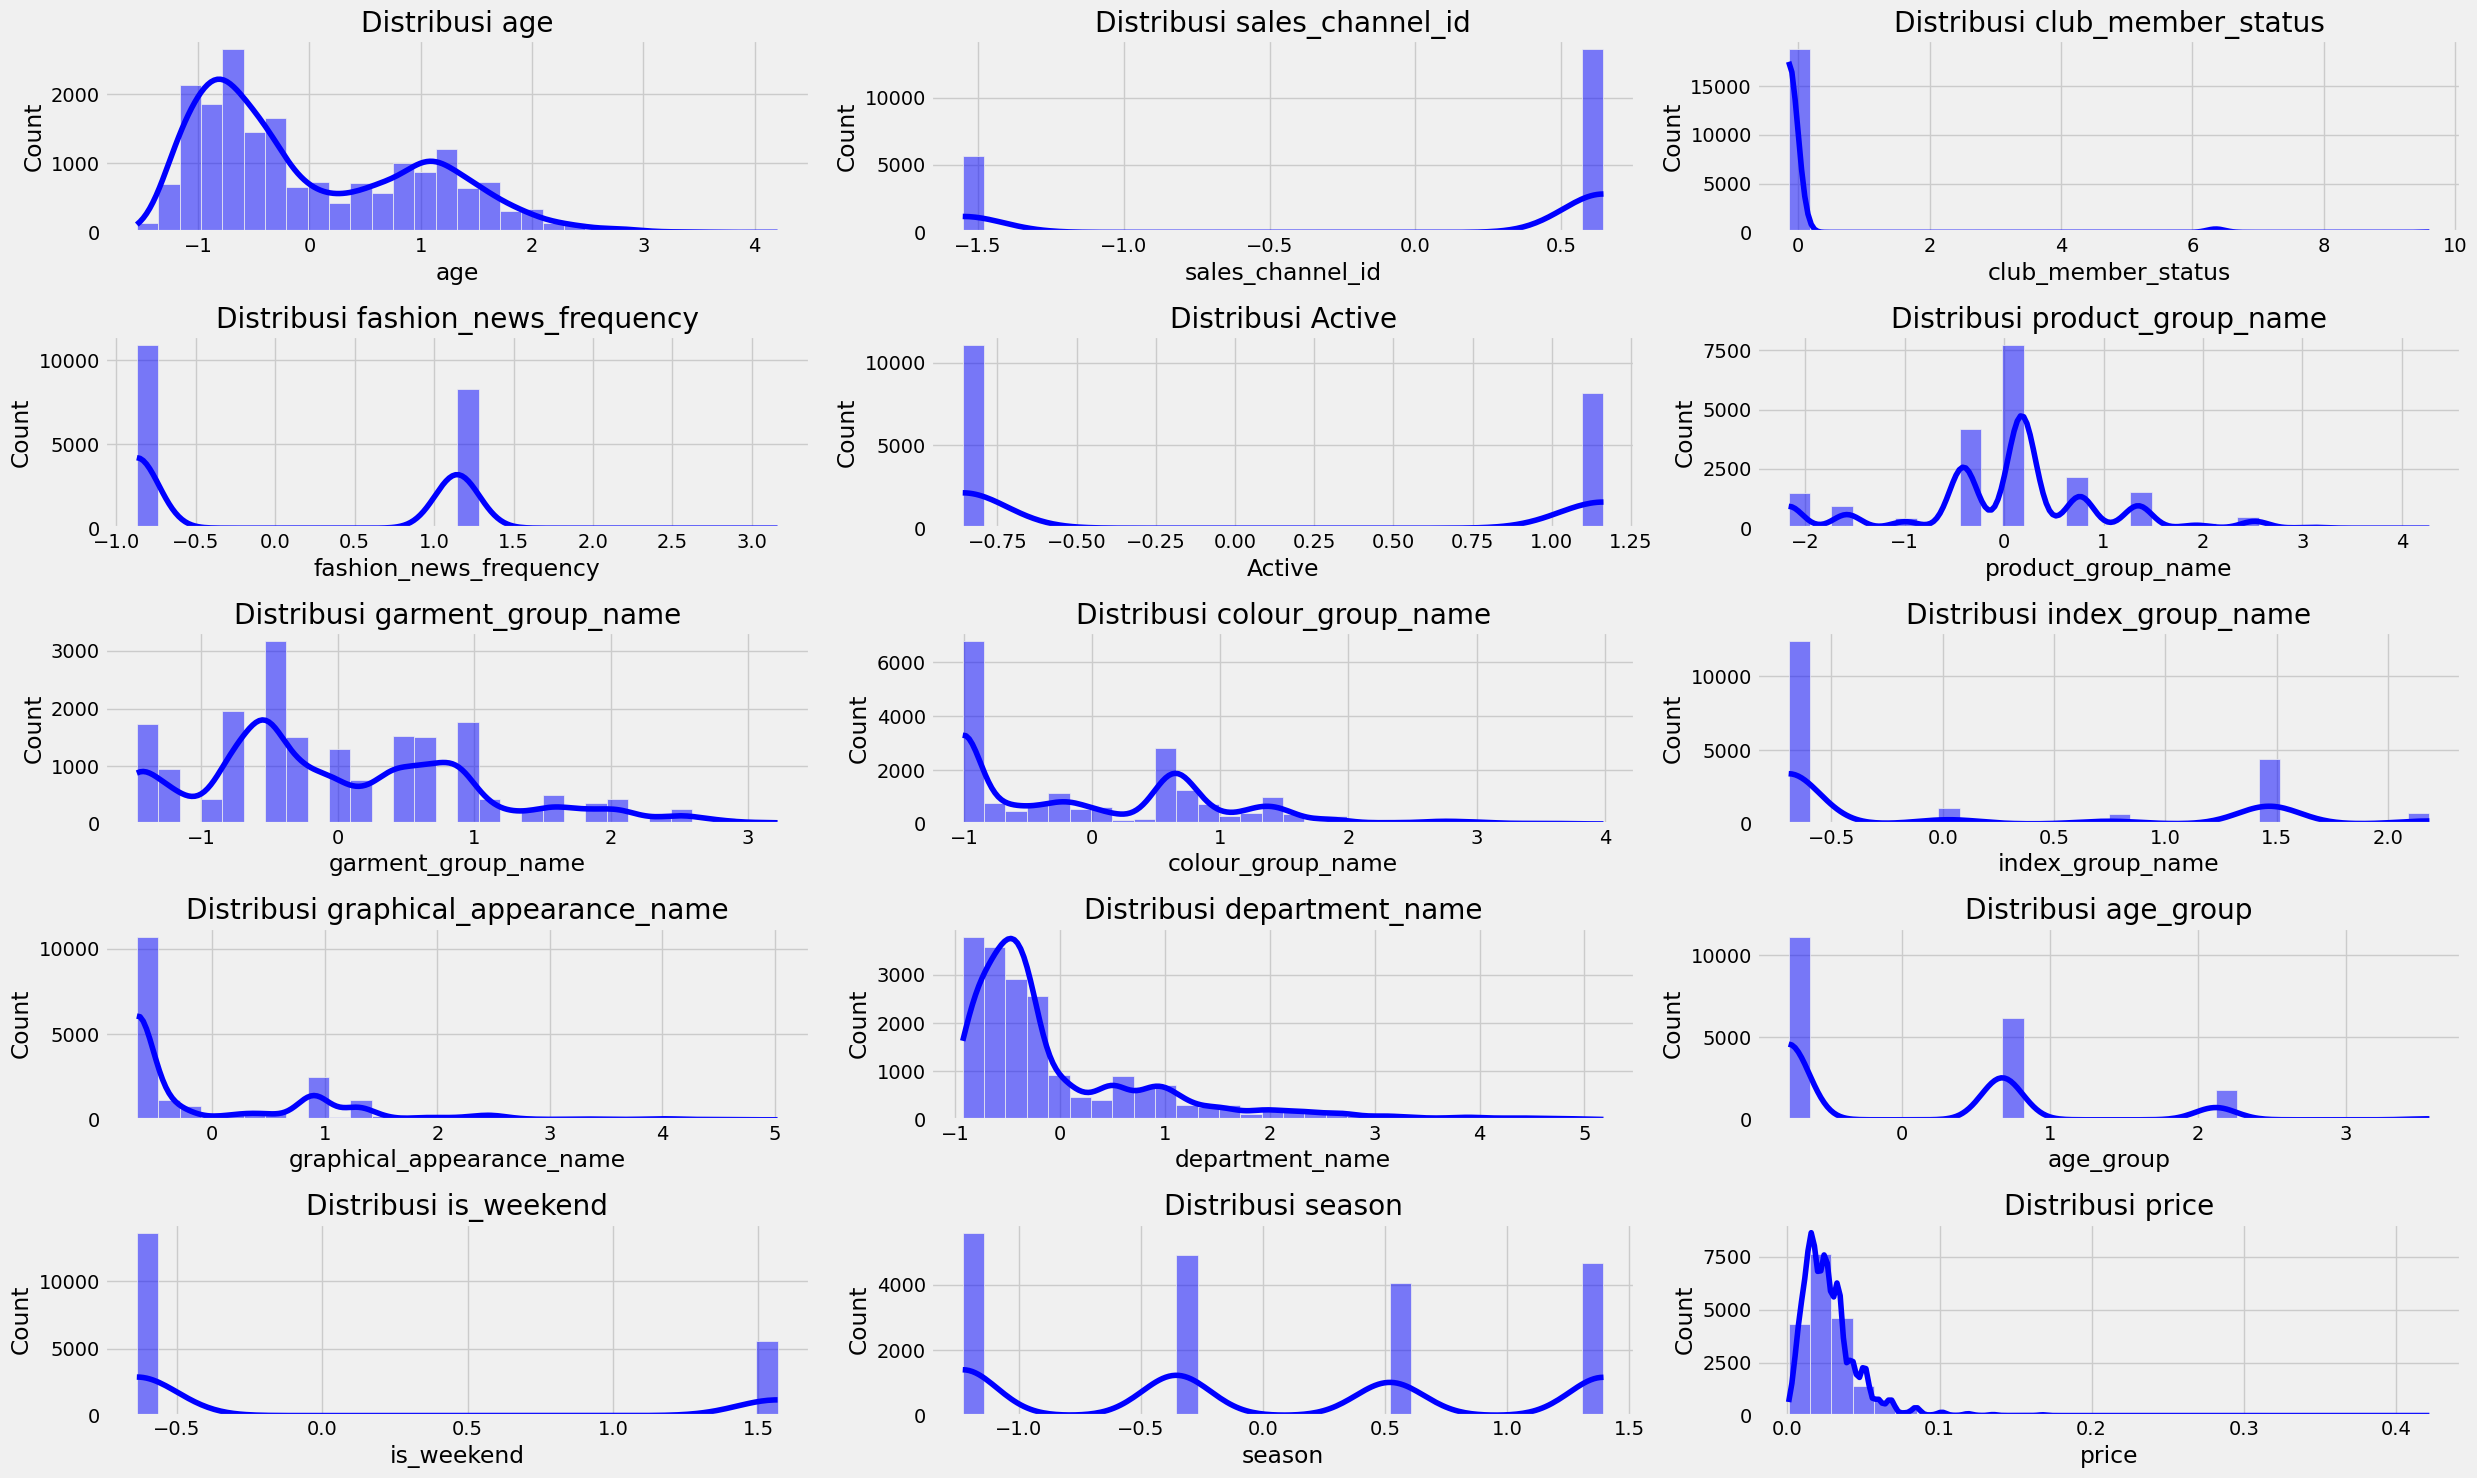

In [61]:
plt.figure(figsize=(25,15))
for index, columns in enumerate(df_scale.columns, 1):
  plt.subplot(5,3, index)
  sns.histplot(df_scale[columns], bins=30, kde=True, color='blue')
  plt.title(f'Distribusi {columns}')
plt.tight_layout()
plt.show()

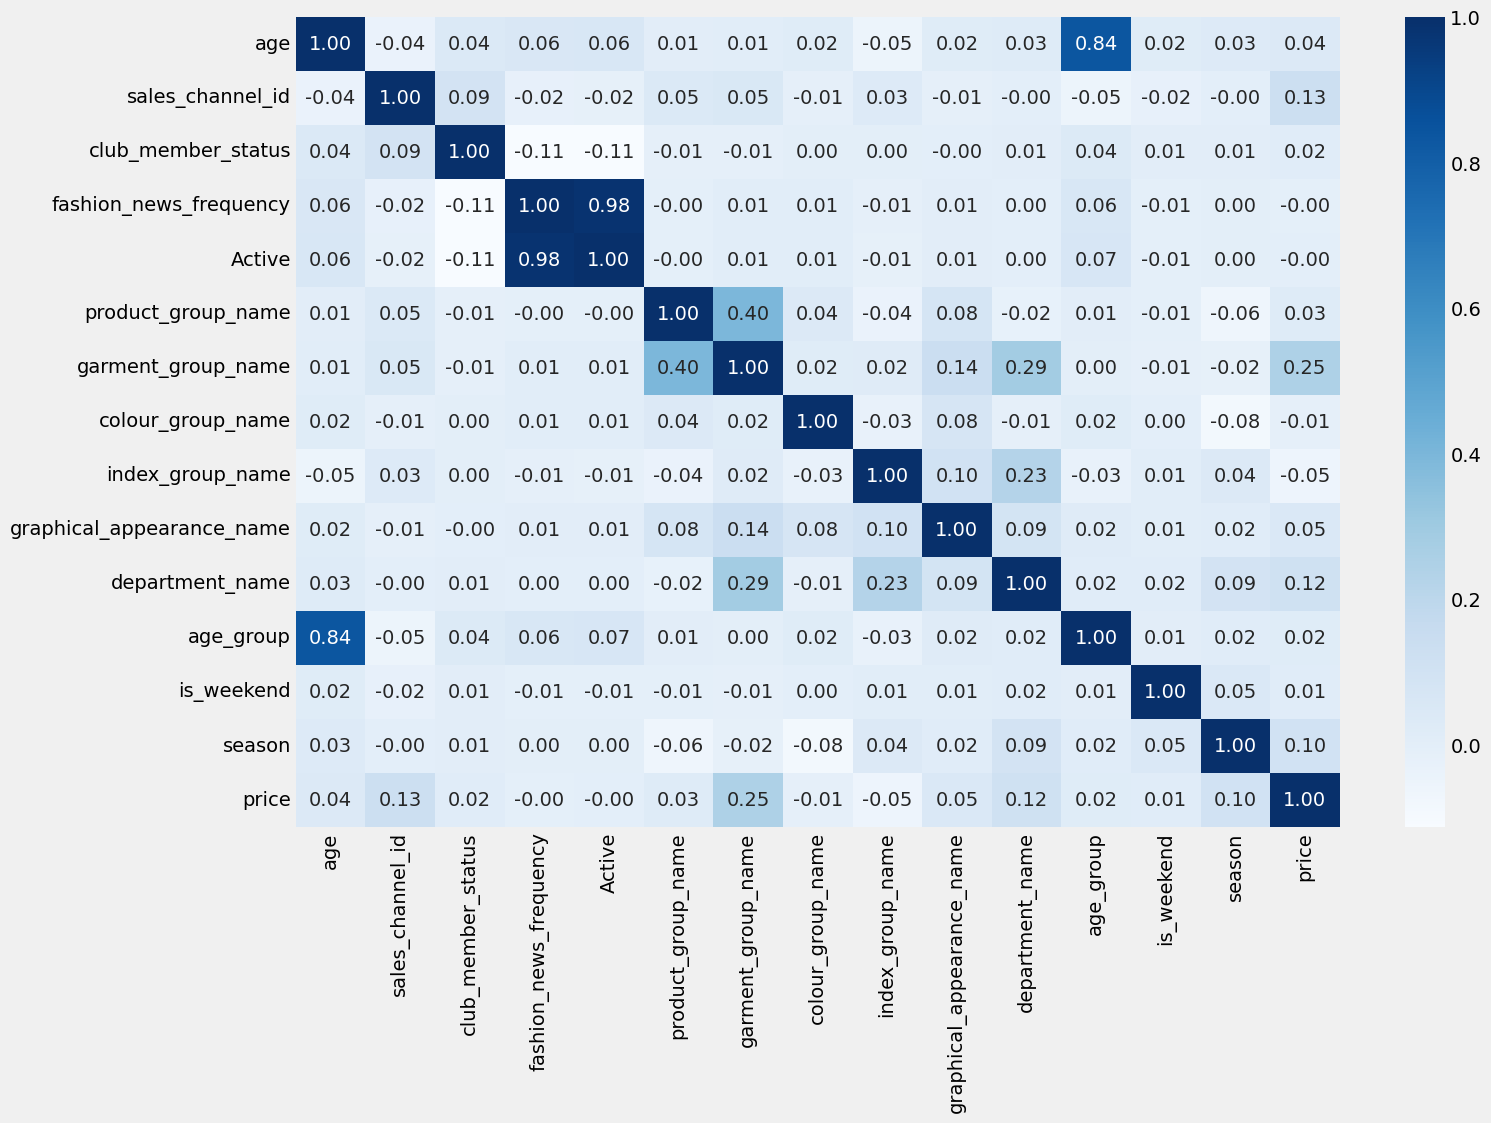

In [62]:
matrix_corr = df_scale.corr()
plt.figure(figsize=(15,10))
sns.heatmap(matrix_corr, annot=True, cmap='Blues', fmt='.2f')
plt.show()

pada korelasi diatas ternyata fashion_news_frequency & Active memiliki korelasi yang sangat tinggi. hal ini disebabkan oleh pelanggan yang active secara online pasti menerima berita tau fasion_news

# **6. Pembangunan Model Clustering**

### **a. Feature Selection**

Feature Selection dilakukan dengan menggunakan metode Drop Features with High Multicollinearity, yaitu menghapus fitur yang memiliki korelasi tinggi untuk menghindari redundansi. Selain itu, dipilih fitur yang paling relevan untuk segmentasi data.

Dalam proses ini, akan dibuat segmentasi berdasarkan produk dan harga untuk mengelompokkan data secara lebih efektif sesuai dengan pola pembelian pelanggan.

In [63]:
feature_product_segment = ['sales_channel_id', 'club_member_status', 'product_group_name', 'garment_group_name', 'season']
feature_customer_segment = ['age_group', 'club_member_status', 'fashion_news_frequency', 'product_group_name','price']

In [64]:
product_segment = df_scale[feature_product_segment]

In [71]:
customer_segment = fasion_hnm[feature_customer_segment].copy()
cat_features = ['age_group', 'club_member_status', 'fashion_news_frequency', 'product_group_name']

le_segment = OrdinalEncoder()
customer_segment[cat_features] = le_segment.fit_transform(customer_segment[cat_features])

scaler_segment = StandardScaler()
customer_segment_scale = scaler_segment.fit_transform(customer_segment[cat_features])
df_customer_segment_scale = pd.DataFrame(customer_segment_scale, columns=cat_features)
df_customer_segment_scale['price'] = customer_segment['price']

### **b. Pemilihan Model dan Hyperparameter**

Sebelum memilih model yang akan digunakan disini dilakukan pengujian model dan parameter untuk mengetahui seberapa baik model bekerja pada data yang diberikan. Model yang diujikan ada 3 yaitu : K-means, DBSCAN, GMM

#### Pengujian model K-means

In [75]:
# Pengujian dengan model k-Means
def kmeans_pipeline(n_clusters, init, max_iter):
  pipeline_kmeans = Pipeline([
      ('kmeans', KMeans(n_clusters=n_clusters,
                        init=init,
                        max_iter=max_iter,
                        random_state=42))
  ])
  return pipeline_kmeans

def kmeans_evaluasion(params, data):
  n_cluster, init, max_iter = params
  pipeline = kmeans_pipeline(n_cluster, init, max_iter)
  labels = pipeline.fit_predict(data)
  return -silhouette_score(data, labels)

def kmeans_optimize (data):
  tunning = [
    Integer(3, 5, name='n_cluster'),
    Categorical(['k-means++', 'random'], name='init'),
    Integer(100, 300, name='max_iter')
    ]
  param_data = partial(kmeans_evaluasion, data=data)
  result = gp_minimize(param_data, tunning, n_calls=30,  n_random_starts=10, random_state=42)
  best_n_clusters, best_init, best_max_iter = result.x
  best_score = -result.fun

  print(f"Optimal n_clusters: {best_n_clusters}")
  print(f"Optimal init: {best_init}")
  print(f"Optimal max_iter: {best_max_iter}")
  print(f"Best silhouette score: {best_score}")


In [76]:
kmeans_optimize(product_segment)

Optimal n_clusters: 5
Optimal init: random
Optimal max_iter: 100
Best silhouette score: 0.3389046523590458


In [77]:
print(kmeans_optimize(df_customer_segment_scale))

Optimal n_clusters: 5
Optimal init: random
Optimal max_iter: 277
Best silhouette score: 0.46009864236510023
None


#### Pengujian Model DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [78]:
# Pengujian dengan model DBSCAN
def dbscan_pipeline(eps, min_sample):
  pipeline_dbscan = Pipeline([
      ('dbscan', DBSCAN(eps = eps,
                        min_samples= min_sample))
  ])
  return pipeline_dbscan
def dbscan_evaluation (params, data):
  eps, min_sample = params
  pipeline = dbscan_pipeline(eps, min_sample)
  labels = pipeline.fit_predict(data)
  if len(np.unique(labels)) <=1 :
    return -1
  else :
    return -silhouette_score(data, labels)

def dbscan_optimize(data):
  tunning = [
      Real(0.5, 2.0, name='eps'),
      Integer(5,20, name='min_sample')
  ]
  param_data = partial(dbscan_evaluation, data=data)
  result = gp_minimize(param_data, tunning, n_calls=30,  n_random_starts=10, random_state=42)
  best_eps, best_min_samples = result.x
  best_score = -result.fun
  best_pipeline = dbscan_pipeline(best_eps, best_min_samples)
  best_labels = best_pipeline.fit_predict(data)
  best_num_clusters = len(set(best_labels) - {-1})

  print(f'Optimal eps : {best_eps}')
  print(f'Optimal min_sample : {best_min_samples}')
  print(f'Best Silhouette Score : {best_score}')
  print(f'Jumlah cluster terbentuk: {best_num_clusters}')

In [79]:
print(dbscan_optimize(product_segment))

Optimal eps : 0.5706432563284609
Optimal min_sample : 5
Best Silhouette Score : 0.5355571028208113
Jumlah cluster terbentuk: 147
None


In [80]:
print(dbscan_optimize(df_customer_segment_scale))

Optimal eps : 0.5
Optimal min_sample : 5
Best Silhouette Score : 0.9601172802326703
Jumlah cluster terbentuk: 86
None


#### Pengujian Model GMM(Gaussian Mixture Model)

In [81]:
# Pengujian pada model GMM
def gmm_pipeline(n_components, covariance_type):
  pipeline = Pipeline([
      ('gmm', GaussianMixture(n_components=n_components, covariance_type=covariance_type, random_state=42))
  ])
  return pipeline

def gmm_evaluation(params, data):
  n_components, covariance_type = params
  pipeline = gmm_pipeline(n_components, covariance_type)
  labels = pipeline.fit(data).predict(data)

  if len(set(labels)) <= 1:
    return -1

  return -silhouette_score(data, labels)

def optimize_gmm(data):
  tunning = [
      Integer(3, 5, name='n_components'),
      Categorical(["full", "tied", "diag", "spherical"], name='covariance_type')
  ]
  param_data = partial(gmm_evaluation, data=data)
  result = gp_minimize(param_data, tunning, n_calls=50,  n_random_starts=10, random_state=42)

  best_n_components, best_covariance_type = result.x
  best_score = -result.fun

  print(f'Best n_components : {best_n_components}')
  print(f'Best covariance_type : {best_covariance_type}')
  print(f'Best silhouette score : {best_score}')

In [82]:
print(optimize_gmm(product_segment))

Best n_components : 3
Best covariance_type : diag
Best silhouette score : 0.33037375203645536
None


In [83]:
print(optimize_gmm(df_customer_segment_scale))

Best n_components : 4
Best covariance_type : tied
Best silhouette score : 0.4034785966896747
None


Dari hasil percobaan semua model, silhouette score yang diperoleh untuk setiap model yang diuji kurang dari 0.5. Hal ini menunjukkan bahwa clustering lemah dan cluster tidak terlalu jelas, sehingga pemisahan antar kelompok masih kurang optimal. Namun, masalah ini dapat diatasi dengan feature extraction menggunakan PCA untuk mereduksi dimensi pada data, sehingga struktur cluster dapat lebih terlihat.

### **c. Feature Extraction Principal Component Analysis (PCA)**

Karena data yang dipilih memiliki 5 fitur untuk dilakukan clustering, maka dilakukan reduksi dimensi menjadi 2 dan 3 dimensi menggunakan PCA (Principal Component Analysis). Hal ini bertujuan untuk mempermudah visualisasi dalam bentuk 3D, sehingga pola dari kelima fitur dapat lebih mudah dianalisis.

In [84]:
pca_product_component_2d = PCA(n_components=2)
pca_product_transform_2d = pca_product_component_2d.fit_transform(product_segment)
pca_product_segment_2d = pd.DataFrame(pca_product_transform_2d, columns=['PC1', 'PC2'])
fig = px.scatter(pca_product_segment_2d, x='PC1', y='PC2', title = 'Plot Cluster Product',
                    labels={
                        'PC1' : 'Principal 1',
                        'PC2' : 'Principal 2'
                    })
fig.show()

In [85]:
pca_product_component_3d = PCA(n_components=3)
pca_product_transform_3d = pca_product_component_3d.fit_transform(product_segment)
pca_product_segment_3d = pd.DataFrame(pca_product_transform_3d, columns=['PC1', 'PC2', 'PC3'])
fig = px.scatter_3d(pca_product_segment_3d, x='PC1', y='PC2', z='PC3', title = 'Plot Cluster Product',
                    labels={
                        'PC1' : 'Principal 1',
                        'PC2' : 'Principal 2',
                        'PC3' : 'Principal 3',
                    })
fig.show()

In [86]:
pca_customer_component_2d = PCA(n_components=2)
pca_customer_transform_2d = pca_customer_component_2d.fit_transform(df_customer_segment_scale)
pca_customer_segment_2d = pd.DataFrame(pca_customer_transform_2d, columns=['PC1', 'PC2'])


In [87]:
pca_customer_component_3d = PCA(n_components=3)
pca_customer_transform_3d = pca_customer_component_3d.fit_transform(df_customer_segment_scale)
pca_customer_segment_3d = pd.DataFrame(pca_customer_transform_3d, columns=['PC1', 'PC2', 'PC3'])
fig = px.scatter_3d(pca_customer_segment_3d, x='PC1', y='PC2', z='PC3', title = 'Plot Cluster customer',
                    labels={
                        'PC1' : 'Principal 1',
                        'PC2' : 'Principal 2',
                        'PC3' : 'Principal 3',
                    })
fig.show()

In [88]:
pca_customer_component_3d = PCA(n_components=3)
pca_customer_transform_3d = pca_customer_component_3d.fit_transform(df_customer_segment_scale)
pca_customer_segment_3d = pd.DataFrame(pca_customer_transform_3d, columns=['PC1', 'PC2', 'PC3'])
fig = px.scatter_3d(pca_customer_segment_3d, x='PC1', y='PC2', z='PC3', title = 'Plot Cluster Customer',
                    labels={
                        'PC1' : 'Principal 1',
                        'PC2' : 'Principal 2',
                        'PC3' : 'Principal 3',
                    })
fig.show()

In [77]:
print(f'{kmeans_optimize(pca_customer_segment_2d)}')

Optimal n_clusters: 5
Optimal init: k-means++
Optimal max_iter: 256
Best silhouette score: 0.837528639778851
None


In [80]:
print(f'{kmeans_optimize(pca_customer_segment_3d)}')

Optimal n_clusters: 4
Optimal init: random
Optimal max_iter: 101
Best silhouette score: 0.4035928466733107
None


In [81]:
print(f'{kmeans_optimize(pca_product_segment_2d)}')

Optimal n_clusters: 5
Optimal init: k-means++
Optimal max_iter: 256
Best silhouette score: 0.5892118855905438
None


In [82]:
print(f'{kmeans_optimize(pca_product_segment_3d)}')

Optimal n_clusters: 4
Optimal init: k-means++
Optimal max_iter: 120
Best silhouette score: 0.38161207263207664
None


In [83]:
print(f'{dbscan_optimize(pca_customer_segment_2d)}')

Optimal eps : 0.5
Optimal min_sample : 5
Best Silhouette Score : 0.968987410854019
Jumlah cluster terbentuk: 15
None


In [84]:
print(f'{dbscan_optimize(pca_customer_segment_3d)}')

Optimal eps : 0.5252284315212303
Optimal min_sample : 5
Best Silhouette Score : 0.989880570674404
Jumlah cluster terbentuk: 86
None


In [85]:
print(f'{dbscan_optimize(pca_product_segment_2d)}')

Optimal eps : 1.188873337948801
Optimal min_sample : 10
Best Silhouette Score : 0.6257736443898324
Jumlah cluster terbentuk: 3
None


In [86]:
print(f'{dbscan_optimize(pca_product_segment_3d)}')

Optimal eps : 1.6883717535734966
Optimal min_sample : 20
Best Silhouette Score : 0.5995198117221633
Jumlah cluster terbentuk: 3
None


In [87]:
print(f'{optimize_gmm(pca_customer_segment_2d)}')

Best n_components : 5
Best covariance_type : full
Best silhouette score : 0.8355922684205006
None


In [88]:
print(f' {optimize_gmm(pca_customer_segment_3d)}')

Best n_components : 3
Best covariance_type : diag
Best silhouette score : 0.33329942110061933
 None


In [89]:
print(f'{optimize_gmm(pca_product_segment_2d)}')

Best n_components : 5
Best covariance_type : spherical
Best silhouette score : 0.5678870108674867
None


In [90]:
print(f' {optimize_gmm(pca_product_segment_3d)}')

Best n_components : 5
Best covariance_type : tied
Best silhouette score : 0.38271830557910325
 None


Tuning yang optimal dipilih berdasarkan silhouette score yang bernilai ≥ 0.7 dan pada kasus ini saya memutuskan jumlah cluster yang optimal adalah antara 3 hingga 5 cluster. Jumlah cluster yang terlalu banyak dapat menyebabkan overfitting dan menghasilkan kategori yang terlalu kompleks, sehingga kurang efektif untuk interpretasi data. Setelah dilakukan reduksi dimensi menggunakan PCA, hasil clustering menjadi lebih optimal.
1. Model K-Means dengan init=k-means++ dan max_iter=256 menghasilkan 5 cluster dengan silhouette score 0.8375 untuk data price, menggunakan PCA dengan 2 komponen.
2. Sedangkan untuk data product clustering, hasilnya masih kurang optimal. Model K-Means hanya mencapai silhouette score sebesar 0.6, yang masih tergolong rendah dan belum menghasilkan segmentasi yang jelas.

### **d. Pembangunan Model Clustering**

parameter paling terbaik untuk pengclusteran price adalah
1. `init` = 'k-means'
2. `best_n_clusters` = 5
3. `max_iter` = 256

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



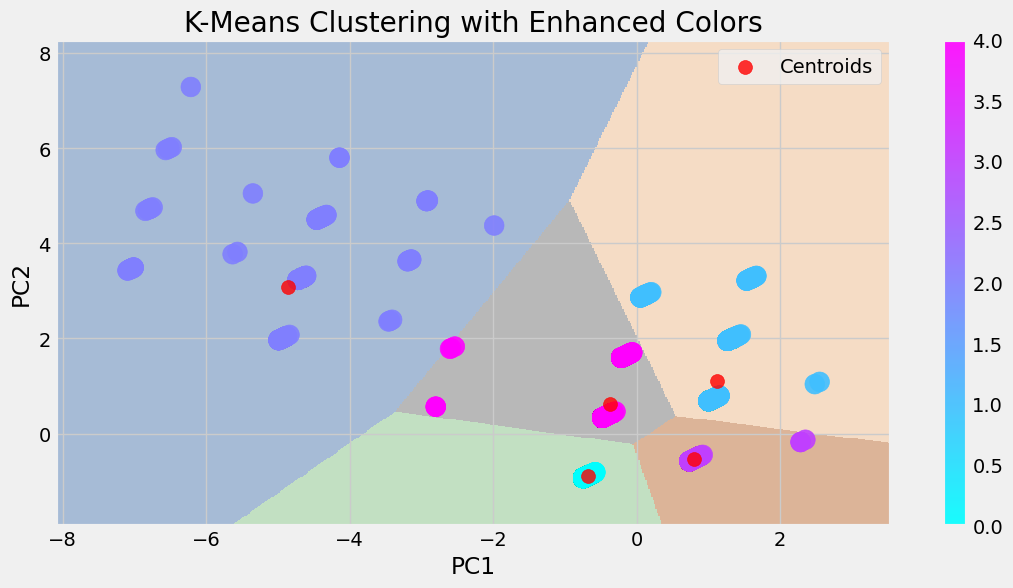

In [91]:
pipeline = kmeans_pipeline(n_clusters=5, init='k-means++', max_iter=256)
labels = pipeline.fit_predict(pca_customer_segment_2d)
kmeans_model = pipeline.named_steps['kmeans']
centroids = kmeans_model.cluster_centers_
h = 0.02
x_min, x_max = pca_customer_segment_2d["PC1"].min() - 1, pca_customer_segment_2d["PC1"].max() + 1
y_min, y_max = pca_customer_segment_2d["PC2"].min() - 1, pca_customer_segment_2d["PC2"].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = pipeline.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12, 6))
plt.clf()

plt.imshow(Z, interpolation="nearest", extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Accent, aspect = 'auto', origin='lower', alpha=0.4)

scatter = plt.scatter(pca_customer_segment_2d["PC1"], pca_customer_segment_2d["PC2"],
                      c=labels, cmap=plt.cm.cool, s=200, alpha=0.9)

plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c="red", marker="o", alpha=0.8, label="Centroids")

plt.colorbar(scatter)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-Means Clustering with Enhanced Colors")

plt.legend()
plt.show()


## **e. Evaluasi Model Clustering**

K = 2, Silhouette Score = 0.5119
K = 3, Silhouette Score = 0.5522
K = 4, Silhouette Score = 0.6738
K = 5, Silhouette Score = 0.8375
K = 6, Silhouette Score = 0.8879
K = 7, Silhouette Score = 0.9535
K = 8, Silhouette Score = 0.9511
K = 9, Silhouette Score = 0.9520
K = 10, Silhouette Score = 0.9522


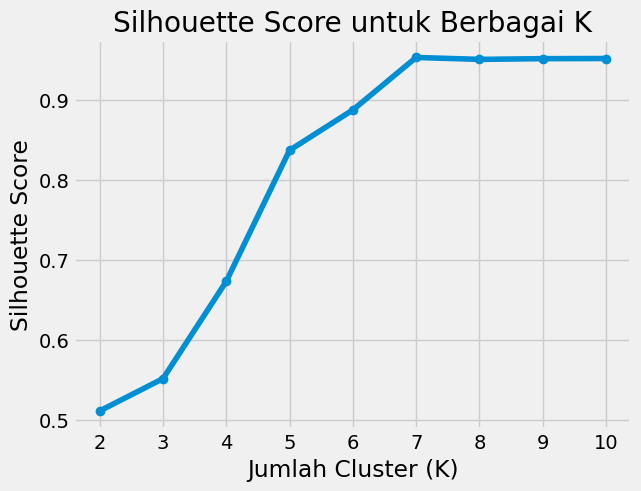

In [92]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels_kmeans = kmeans.fit_predict(pca_customer_segment_2d)

    score = silhouette_score(pca_customer_segment_2d, labels_kmeans)
    silhouette_scores.append(score)

    print(f"K = {k}, Silhouette Score = {score:.4f}")  # Cetak nilai silhouette

# Plot Silhouette Score
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Berbagai K')
plt.show()

Dari hasil evaluasi, dapat dilihat bahwa model K-Means dengan jumlah 5 cluster telah mencapai silhouette score sebesar 0.8375, yang menunjukkan bahwa clustering sudah cukup baik dengan pemisahan antar cluster yang lebih jelas.

## **e. Analisis dan Interpretasi Hasil Cluster**

#### Inverse Data

In [93]:
kolom =['age_group', 'club_member_status', 'fashion_news_frequency',
       'product_group_name']
invers_scale = scaler_segment.inverse_transform(df_customer_segment_scale[kolom])
df_customer_segment = pd.DataFrame(invers_scale, columns=kolom)
invers_df_customer_segment = le_segment.inverse_transform(df_customer_segment)
df_customer_segment[kolom] = invers_df_customer_segment
df_customer_segment['price'] = df_customer_segment_scale['price']
df_customer_segment['price']
df_customer_segment.head()

age_group club_member_status fashion_news_frequency  product_group_name  \
0  Young Adult             ACTIVE                   NONE                 NaN   
1  Young Adult             ACTIVE              Regularly         Accessories   
2  Young Adult             ACTIVE                   NONE               Shoes   
3  Young Adult             ACTIVE                   NONE  Garment Lower body   
4  Young Adult          LEFT CLUB                   NONE  Garment Upper body   

      price  
0  0.025407  
1  0.011847  
2  0.033881  
3  0.016932  
4  0.016932

In [94]:
df_customer_segment.isnull().sum()

age_group                    0
club_member_status           0
fashion_news_frequency       0
product_group_name        1499
price                        0
dtype: int64

Di sini dapat dilihat bahwa kolom product_group_name memiliki NaN value. Hal ini terjadi saat melakukan inverse_transform(), dimana nilai NaN bisa muncul karena terdapat nilai numerik yang tidak dikenali oleh encoder. Namun, karena urutan data tetap sama dengan data asli, kolom ini dapat digantikan (replace) dengan isi dari kolom product_group_name yang asli.

In [95]:
df_customer_segment['product_group_name'] = fasion_hnm['product_group_name']

#### Interpretasi Target

 Setelah mendapatkan hasil clustering, label cluster dapat  ditambahkan pada data

In [96]:
df_customer_segment['clusters'] = labels

In [97]:
df_customer_segment.head()

age_group club_member_status fashion_news_frequency  product_group_name  \
0  Young Adult             ACTIVE                   NONE           Underwear   
1  Young Adult             ACTIVE              Regularly         Accessories   
2  Young Adult             ACTIVE                   NONE               Shoes   
3  Young Adult             ACTIVE                   NONE  Garment Lower body   
4  Young Adult          LEFT CLUB                   NONE  Garment Upper body   

      price  clusters  
0  0.025407         0  
1  0.011847         3  
2  0.033881         0  
3  0.016932         0  
4  0.016932         4

In [98]:
cluster_1 = df_customer_segment[df_customer_segment['clusters'] == 0]
cluster_2 = df_customer_segment[df_customer_segment['clusters'] == 1]
cluster_3 = df_customer_segment[df_customer_segment['clusters'] == 2]
cluster_4 = df_customer_segment[df_customer_segment['clusters'] == 3]
cluster_5 = df_customer_segment[df_customer_segment['clusters'] == 4]


In [99]:
segment = df_customer_segment.copy()

In [101]:
segment['age'] = fasion_hnm['age']

segment = segment[['age_group', 'age','club_member_status','fashion_news_frequency','product_group_name','price', 'clusters' ]]

In [102]:
cluster_1.describe(include='number')

price  clusters
count  6415.000000    6415.0
mean      0.027517       0.0
std       0.018203       0.0
min       0.000797       0.0
25%       0.015237       0.0
50%       0.025407       0.0
75%       0.033881       0.0
max       0.299695       0.0

In [103]:
cluster_1.describe(include='object')

age_group club_member_status fashion_news_frequency  \
count          6415               6415                   6415   
unique            1                  1                      1   
top     Young Adult             ACTIVE                   NONE   
freq           6415               6415                   6415   

        product_group_name  
count                 6415  
unique                  11  
top     Garment Upper body  
freq                  2497

In [104]:
cluster_2.describe(include='number')

price  clusters
count  3855.000000    3855.0
mean      0.028038       1.0
std       0.020610       0.0
min       0.001119       1.0
25%       0.015246       1.0
50%       0.025407       1.0
75%       0.033881       1.0
max       0.337288       1.0

In [105]:
cluster_2.describe(include='object')

age_group club_member_status fashion_news_frequency  product_group_name
count       3855               3855                   3855                3855
unique         3                  1                      3                  12
top        Adult             ACTIVE              Regularly  Garment Upper body
freq        2794               3855                   3767                1595

In [106]:
cluster_3.describe(include='number')

price  clusters
count  413.000000     413.0
mean     0.030419       2.0
std      0.019470       0.0
min      0.003373       2.0
25%      0.016932       2.0
50%      0.025407       2.0
75%      0.033881       2.0
max      0.167797       2.0

In [107]:
cluster_3.describe(include='object')

age_group club_member_status fashion_news_frequency  \
count           413                413                    413   
unique            4                  3                      2   
top     Young Adult         PRE-CREATE                   NONE   
freq            184                372                    391   

        product_group_name  
count                  413  
unique                  10  
top     Garment Upper body  
freq                   164

In [108]:
cluster_4.describe(include='number')

price  clusters
count  4504.000000    4504.0
mean      0.027365       3.0
std       0.020057       0.0
min       0.000831       3.0
25%       0.015237       3.0
50%       0.024483       3.0
75%       0.033881       3.0
max       0.422034       3.0

In [109]:
cluster_4.describe(include='object')

age_group club_member_status fashion_news_frequency  \
count          4504               4504                   4504   
unique            1                  1                      2   
top     Young Adult             ACTIVE              Regularly   
freq           4504               4504                   4501   

        product_group_name  
count                 4504  
unique                  12  
top     Garment Upper body  
freq                  1808

In [110]:
cluster_5.describe(include='number')

price  clusters
count  4015.000000    4015.0
mean      0.028607       4.0
std       0.019054       0.0
min       0.000831       4.0
25%       0.016932       4.0
50%       0.025407       4.0
75%       0.033881       4.0
max       0.252542       4.0

In [111]:
cluster_5.describe(include='object')

age_group club_member_status fashion_news_frequency  product_group_name
count       4015               4015                   4015                4015
unique         3                  2                      1                  11
top        Adult             ACTIVE                   NONE  Garment Upper body
freq        3205               4009                   4015                1644

In [114]:
fasion_data_hnm['price'].describe()

count    19202.000000
mean         0.027876
std          0.019357
min          0.000797
25%          0.015513
50%          0.025407
75%          0.033881
max          0.422034
Name: price, dtype: float64

# Analisis Karakteristik Cluster dari Model KMeans


## Cluster 1:
- **Rata-rata Harga Produk :** 0.027517	  
- **Golongan Pembeli paling banyak :** Young Adult
- **Status Club Pelanggan :** Active
- **Golongan Penerima Berita Fasion :** None
- **Range Harga Belanja** :  0.000797 - 0.027517
- **Analisis:** terdiri dari pelanggan muda yang aktif sebagai anggota klub, tetapi tidak berlangganan berita fashion. Mereka cenderung membeli produk dengan harga paling murah.

## Cluster 2:
- **Rata-rata Harga Produk :** 0.028038		  
- **Golongan Pembeli paling banyak :**  Adult
- **Status Club Pelanggan :** Active
- **Golongan Penerima Berita Fasion :** Regularly
- **Range Harga Belanja** : 0.001119	- 0.337288
- **Analisis:**  didominasi oleh pelanggan dewasa yang aktif di klub dan secara rutin menerima berita fashion. Mereka memiliki range harga belanja yang lebih luas dan mencerminkan minat belanja yang tinggi.

## Cluster 3:
- **Rata-rata Harga Produk :** 0.030419	  
- **Golongan Pembeli paling banyak :**  Young Adult
- **Status Club Pelanggan :** PRE-CREATE
- **Golongan Penerima Berita Fasion :** NONE
- **Range Harga Belanja** : 0.003373 - 0.167797
- **Analisis:** mayoritas terdiri dari pelanggan muda dengan status PRE-CREATE pad club dan tidak menerima berita fashion. Mereka memiliki kisaran harga belanja yang cukup sempit yang menunjukkan perilaku pembelian yang selektif.

## Cluster 4:
- **Rata-rata Harga Produk :** 0.027365	  
- **Golongan Pembeli paling banyak :**  Young Adult
- **Status Club Pelanggan :** ACTIVE
- **Golongan Penerima Berita Fasion :** Regularly
- **Range harga Belanja** : 0.000831 - 0.422034
- **Analisis:**  pelanggan muda yang aktif dan rutin menerima berita fashion. Mereka memiliki rentang belanja yang lebih luas dibandingkan dengan cluster lainnya, menunjukkan keterlibatan yang lebih tinggi dalam pembelian fashion.

## Cluster 5:
- **Rata-rata Harga Produk :** 0.028607  
- **Golongan Pembeli paling banyak :**  Adult
- **Status Club Pelanggan :** ACTIVE
- **Golongan Penerima Berita Fasion :** NONE
- **Range Harga Belanja** : 0.000831 - 0.252542
- **Analisis:** didominasi oleh pelanggan dewasa yang aktif di klub tetapi tidak berlangganan berita fashion. Dengan kisaran harga belanja yang menengah.

### Kelompok Pelanggan
1. Pelanggan Muda dengan Pembelian Terbatas (Cluster 1 & 3)
2. Pelanggan Dewasa dengan Preferensi Beragam (Cluster 2 & 5)
3. Pelanggan Muda dengan Minat Tinggi pada Fashion (Cluster 4)

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
segment.to_csv(' Dataset_inisiasi.csv', index=False)